In [1]:
library("ggplot2")
library("dplyr")
library("repr")
library("reshape2")
library("stats")

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



- 1 - GoalKeeper
- 2-5, Defender
- 6, 8, 10 - Midfielder
- 7, 9, 11 - Attacker

- GK 
- CB, LB, RB, LWB, RWB
- CDM, CAM, LM, RM, CM
- LW, RW, ST, CF


In [35]:
players <- read.csv("./fifa23_players_data.csv")

In [3]:
teams <- read.csv("./fifa23_teams_data.csv")

In [26]:
head(players)

Known.As,Full.Name,Overall,Potential,Value.in.Euro.,Positions.Played,Best.Position,Nationality,Image.Link,Age,...,LM.Rating,CM.Rating,RM.Rating,LWB.Rating,CDM.Rating,RWB.Rating,LB.Rating,CB.Rating,RB.Rating,GK.Rating
L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
K. MbappÃ©,Kylian MbappÃ©,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21
M. Salah,Mohamed Salah,90,90,115500000,RW,RW,Egypt,https://cdn.sofifa.net/players/209/331/23_60.png,30,...,90,85,90,74,71,74,70,61,70,25


In [49]:
length(summary(players$Best.Position))

[1] 15

In [38]:
players[c('Known.As','Club.Jersey.Number', 'Best.Position')]

Known.As,Club.Jersey.Number,Best.Position
L. Messi,30,CAM
K. Benzema,9,CF
R. Lewandowski,9,ST
K. De Bruyne,17,CM
K. MbappÃ©,7,ST
M. Salah,11,RW
T. Courtois,1,GK
M. Neuer,1,GK
Cristiano Ronaldo,7,ST
V. van Dijk,4,CB


In [ ]:
sumamry()

In [30]:
# summary(players$National.Team.Jersey.Number)

In [39]:
# convert the values of column 'x' to numerical; 
players$Club.Jersey.Number <- as.numeric(as.character(players$Club.Jersey.Number))
class(players$Club.Jersey.Number);
summary(players$Club.Jersey.Number)

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"

[1] "numeric"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   1.00    9.00   18.00   21.11   27.00   99.00      92 

In [42]:
starters <- players[(players$Club.Jersey.Number >= 1) & (players$Club.Jersey.Number <= 11), ]
starters <- starters[complete.cases(starters$Club.Jersey.Number), ]
dim(starters)

[1] 6305   89

In [43]:
summary(starters$Club.Jersey.Number)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   3.000   6.000   6.085   9.000  11.000 

In [44]:
# position_cat <- mutate(starters, numberGroup = ifelse(Club.Jersey.Number == 1, "Goalkeeper", 
#                                                ifelse(Club.Jersey.Number >= 2 & Club.Jersey)))
# head(df_filtered); dim(df_filtered)

starters[c('Known.As','Club.Jersey.Number', 'Best.Position')]

,Known.As,Club.Jersey.Number,Best.Position
2,K. Benzema,9,CF
3,R. Lewandowski,9,ST
5,K. MbappÃ©,7,ST
6,M. Salah,11,RW
7,T. Courtois,1,GK
8,M. Neuer,1,GK
9,Cristiano Ronaldo,7,ST
10,V. van Dijk,4,CB
11,H. Kane,10,ST
12,Neymar Jr,10,LW


In [60]:
colnames(players)

[1] "Known.As"                    "Full.Name"                  
 [3] "Overall"                     "Potential"                  
 [5] "Value.in.Euro."              "Positions.Played"           
 [7] "Best.Position"               "Nationality"                
 [9] "Image.Link"                  "Age"                        
[11] "Height.in.cm."               "Weight.in.kg."              
[13] "TotalStats"                  "BaseStats"                  
[15] "Club.Name"                   "Wage.in.Euro."              
[17] "Release.Clause"              "Club.Position"              
[19] "Contract.Until"              "Club.Jersey.Number"         
[21] "Joined.On"                   "On.Loan"                    
[23] "Preferred.Foot"              "Weak.Foot.Rating"           
[25] "Skill.Moves"                 "International.Reputation"   
[27] "National.Team.Name"          "National.Team.Image.Link"   
[29] "National.Team.Position"      "National.Team.Jersey.Number"
[31] "Attacking.Work.Rate"         "Defensive.Work.Rate"        
[33] "Pace.Total"                  "Shooting.Total"             
[35] "Passing.Total"               "Dribbling.Total"            
[37] "Defending.Total"             "Physicality.Total"          
[39] "Crossing"                    "Finishing"                  
[41] "Heading.Accuracy"            "Short.Passing"              
[43] "Volleys"                     "Dribbling"                  
[45] "Curve"                       "Freekick.Accuracy"          
[47] "LongPassing"                 "BallControl"                
[49] "Acceleration"                "Sprint.Speed"               
[51] "Agility"                     "Reactions"                  
[53] "Balance"                     "Shot.Power"                 
[55] "Jumping"                     "Stamina"                    
[57] "Strength"                    "Long.Shots"                 
[59] "Aggression"                  "Interceptions"              
[61] "Positioning"                 "Vision"                     
[63] "Penalties"                   "Composure"                  
[65] "Marking"                     "Standing.Tackle"            
[67] "Sliding.Tackle"              "Goalkeeper.Diving"          
[69] "Goalkeeper.Handling"         "GoalkeeperKicking"          
[71] "Goalkeeper.Positioning"      "Goalkeeper.Reflexes"        
[73] "ST.Rating"                   "LW.Rating"                  
[75] "LF.Rating"                   "CF.Rating"                  
[77] "RF.Rating"                   "RW.Rating"                  
[79] "CAM.Rating"                  "LM.Rating"                  
[81] "CM.Rating"                   "RM.Rating"                  
[83] "LWB.Rating"                  "CDM.Rating"                 
[85] "RWB.Rating"                  "LB.Rating"                  
[87] "CB.Rating"                   "RB.Rating"                  
[89] "GK.Rating"

In [4]:
head(teams)

ID,Name,League,LeagueId,Overall,Attack,Midfield,Defence,TransferBudget,DomesticPrestige,IntPrestige,Players,StartingAverageAge,AllTeamAverageAge
1943,AFC Bournemouth,English Premier League (1),13,74,75,73,73,0,2,1,28,25.8,25.5
116418,AFC Richmond,English Premier League (1),13,78,81,79,77,0,5,3,19,27.3,27.3
1,Arsenal,English Premier League (1),13,80,83,81,79,0,7,7,29,24.1,23.0
2,Aston Villa,English Premier League (1),13,79,79,78,80,0,5,3,32,25.8,25.2
1925,Brentford,English Premier League (1),13,75,75,74,75,0,1,1,30,25.4,24.2
1808,Brighton & Hove Albion,English Premier League (1),13,76,76,75,77,0,3,2,31,27.6,23.6


In [62]:
combined <- merge(players, teams, by.x="Club.Name", by.y="Name", all.x = TRUE, all.y=FALSE)
head(combined)

Club.Name,Known.As,Full.Name,Overall.x,Potential,Value.in.Euro.,Positions.Played,Best.Position,Nationality,Image.Link,...,Overall.y,Attack,Midfield,Defence,TransferBudget,DomesticPrestige,IntPrestige,Players,StartingAverageAge,AllTeamAverageAge
1. FC Heidenheim 1846,K. Sessa,Kevin Sessa,68,75,2400000,"CM,RM",RM,Germany,https://cdn.sofifa.net/players/242/974/23_60.png,...,68,69,67,69,0,6,1,28,25.4,24.6
1. FC Heidenheim 1846,T. Keller,Thomas Keller,67,75,2100000,"CB,CDM",CB,Germany,https://cdn.sofifa.net/players/251/289/23_60.png,...,68,69,67,69,0,6,1,28,25.4,24.6
1. FC Heidenheim 1846,A. Geipl,Andreas Geipl,68,68,1000000,CDM,CB,Germany,https://cdn.sofifa.net/players/213/644/23_60.png,...,68,69,67,69,0,6,1,28,25.4,24.6
1. FC Heidenheim 1846,M. Busch,Marnon Busch,71,71,1800000,RB,RB,Germany,https://cdn.sofifa.net/players/224/980/23_60.png,...,68,69,67,69,0,6,1,28,25.4,24.6
1. FC Heidenheim 1846,T. Siersleben,Tim Siersleben,67,74,1900000,"CB,LB",CB,Germany,https://cdn.sofifa.net/players/258/812/23_60.png,...,68,69,67,69,0,6,1,28,25.4,24.6
1. FC Heidenheim 1846,F. Pick,Florian Pick,67,67,1100000,"LM,RM",LM,Germany,https://cdn.sofifa.net/players/237/635/23_60.png,...,68,69,67,69,0,6,1,28,25.4,24.6


In [63]:
# some cleaning
summary(combined$Contract.Until)

- 2022 2023 2024 2025 2026 2027 2028 2031 2032 
  92 2372 6796 4467 2968 1204  611   25    2    2

In [100]:
data <- combined[c('Full.Name','Wage.in.Euro.', 'Value.in.Euro.', 'Nationality', 'Release.Clause', 'Contract.Until')]
head(data)
dim(data)

Full.Name,Wage.in.Euro.,Value.in.Euro.,Nationality,Release.Clause,Contract.Until
Kevin Sessa,7000,2400000,Germany,4200000,2024
Thomas Keller,7000,2100000,Germany,3700000,2025
Andreas Geipl,9000,1000000,Germany,1600000,2023
Marnon Busch,14000,1800000,Germany,2800000,2023
Tim Siersleben,11000,1900000,Germany,0,2023
Florian Pick,8000,1100000,Germany,1700000,2024


[1] 18539     6

In [102]:
# rename
colnames(data)[2] <- "Wage"
colnames(data)[3] <- "Value"
head(data)

Full.Name,Wage,Value,Nationality,Release.Clause,Contract.Until
Kevin Sessa,7000,2400000,Germany,4200000,2024
Thomas Keller,7000,2100000,Germany,3700000,2025
Andreas Geipl,9000,1000000,Germany,1600000,2023
Marnon Busch,14000,1800000,Germany,2800000,2023
Tim Siersleben,11000,1900000,Germany,0,2023
Florian Pick,8000,1100000,Germany,1700000,2024


In [103]:
#Summary of these 4 features
summary(data);
class(data)

                  Full.Name          Wage            Value          
 Adama TraorÃ©         :    3   Min.   :     0   Min.   :        0  
 Diego RodrÃ­guez      :    3   1st Qu.:  1000   1st Qu.:   475000  
 Emmanuel Boateng      :    3   Median :  3000   Median :  1000000  
 Liam Kelly            :    3   Mean   :  8824   Mean   :  2875461  
 Tom Davies            :    3   3rd Qu.:  8000   3rd Qu.:  2000000  
 Ã\201lvaro Aguado MÃ©ndez:    2   Max.   :450000   Max.   :190500000  
 (Other)               :18522                                       
    Nationality    Release.Clause      Contract.Until
 England  : 1632   Min.   :        0   2023   :6796  
 Germany  : 1204   1st Qu.:   665000   2024   :4467  
 Spain    : 1074   Median :  1500000   2025   :2968  
 France   :  963   Mean   :  5081688   2022   :2372  
 Argentina:  937   3rd Qu.:  3400000   2026   :1204  
 Brazil   :  728   Max.   :366700000   2027   : 611  
 (Other)  :12001                       (Other): 121  

[1] "data.frame"

In [104]:
# options(repr.plot.width = 10, repr.plot.height = 5) 
# #Create the histogram
# histogram <- ggplot(data, aes(x = Wage)) + 
#   geom_histogram(binwidth = 1, color = "black", fill = "lightblue") +
  
#   # Add axis labels and adjust tick marks
#   labs(x = "Wage", y = "Count", title = "Distribution of Wage") +
#   scale_x_continuous(breaks = seq(15, 45, by = 2)) +
#   scale_y_continuous(breaks = seq(0, 1600, by = 200)) +

#   # Adjust the size of the plot and labels
#   theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
#         axis.title = element_text(size = 18),
#         axis.text = element_text(size = 18)) 

# #Create the boxplot
# boxplot <- ggplot(data, aes(x = "", y = Wage)) +
#   geom_boxplot(color = "black", fill = "lightgreen") +

#   # Add axis labels and adjust tick marks
#   labs(x = "", y = "Wage", title = "Boxplot of Age") +
#   scale_y_continuous(breaks = seq(15, 45, by = 2)) +

#   # Adjust the size of the plot and labels
#   theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
#         axis.title = element_text(size = 18),
#         axis.text = element_text(size = 18)) +
#   coord_flip() 

# plot(histogram)
# plot(boxplot)

In [105]:
summary(data$Release.Clause)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
        0    665000   1500000   5081688   3400000 366700000 

### Release Clause

In [106]:
# remove players without release clause
hasReleaseClause <- data[data$Release.Clause != 0, ]
head(hasReleaseClause)

,Full.Name,Wage,Value,Nationality,Release.Clause,Contract.Until
1,Kevin Sessa,7000,2400000,Germany,4200000,2024
2,Thomas Keller,7000,2100000,Germany,3700000,2025
3,Andreas Geipl,9000,1000000,Germany,1600000,2023
4,Marnon Busch,14000,1800000,Germany,2800000,2023
6,Florian Pick,8000,1100000,Germany,1700000,2024
7,Jonas FÃ¶hrenbach,11000,1600000,Germany,2600000,2023


In [107]:
#Log transformation of the Value
hasReleaseClause$Release.Clause.Log <- log(hasReleaseClause$Release.Clause)
summary(hasReleaseClause$Release.Clause.Log)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  9.393  13.612  14.346  14.447  15.096  19.720 

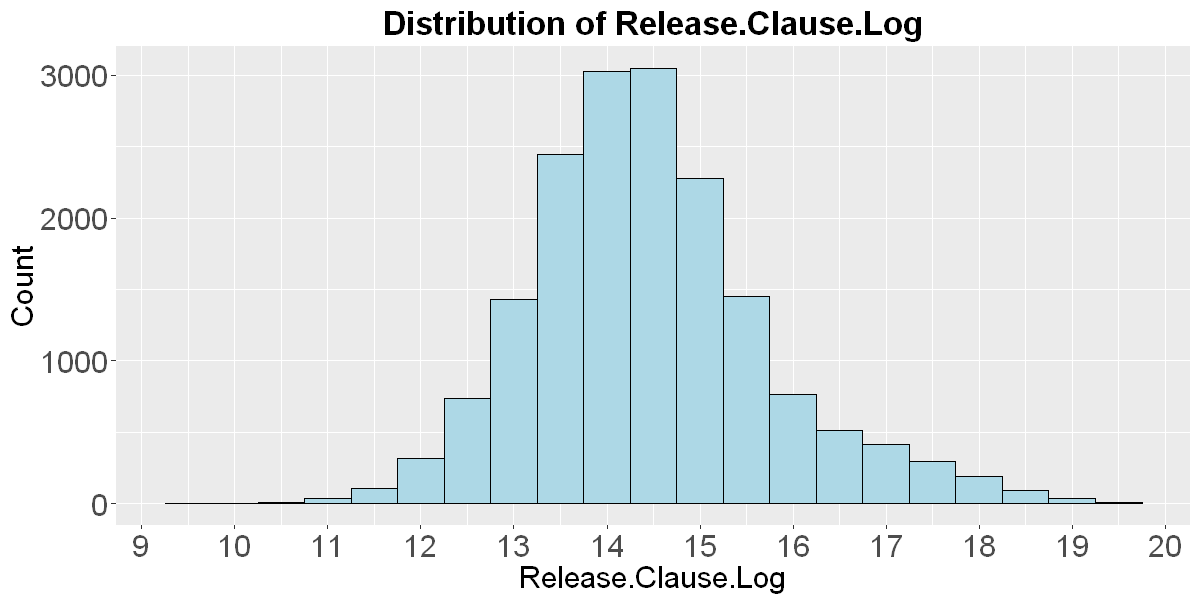

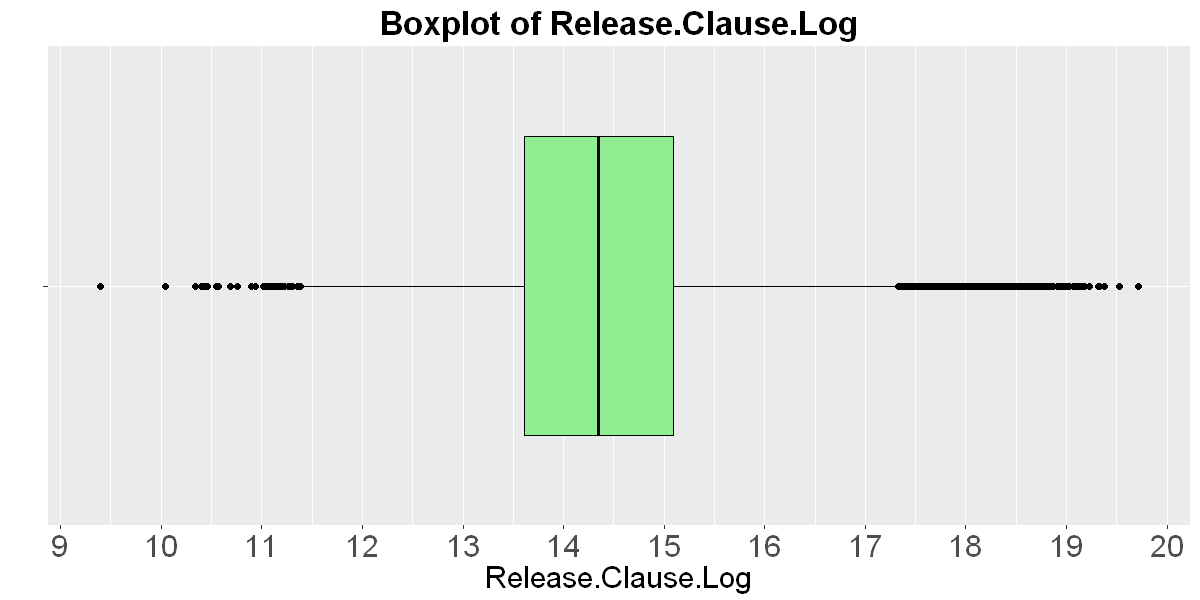

In [76]:
options(repr.plot.width = 10, repr.plot.height = 5) 
#Create the histogram
histogram <- ggplot(hasReleaseClause, aes(x = Release.Clause.Log)) + 
  geom_histogram(binwidth = 0.5, color = "black", fill = "lightblue") +
  
  # Add axis labels and adjust tick marks
  labs(x = "Release.Clause.Log", y = "Count", title = "Distribution of Release.Clause.Log") +
  scale_x_continuous(breaks = seq(8, 20, by = 1)) + 

  # Adjust the size of the plot and labels
  theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 18)) 

# Create the boxplot
boxplot <- ggplot(hasReleaseClause, aes(x = "", y = Release.Clause.Log)) +
  geom_boxplot(color = "black", fill = "lightgreen") +

  # Add axis labels and adjust tick marks
  labs(x = "", y = "Release.Clause.Log", title = "Boxplot of Release.Clause.Log") +
  scale_y_continuous(breaks = seq(8, 20, by = 1)) +

  # Adjust the size of the plot and labels
  theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 18)) +
  coord_flip() 

plot(histogram)
plot(boxplot)

In [108]:
# heatmap
#Select numerical column
num_cols <- select_if(hasReleaseClause, is.numeric)
colnames(num_cols)

[1] "Wage"               "Value"              "Release.Clause"    
[4] "Release.Clause.Log"

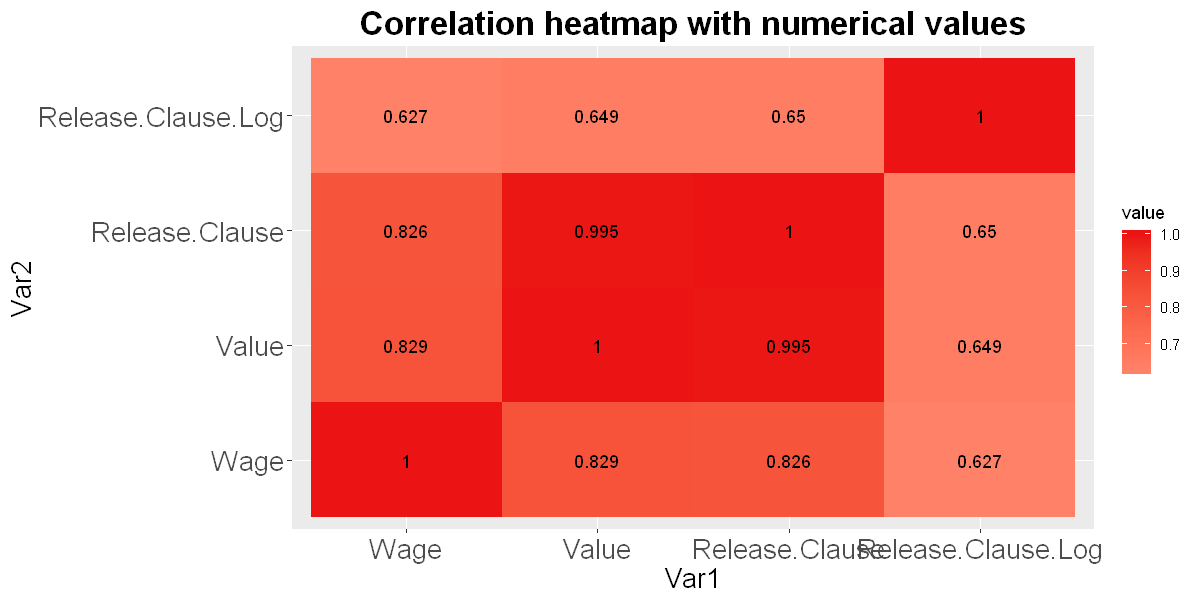

In [109]:
#Correlation of each numerical values
corr_mat <- cor(num_cols)
melted_corr_mat <- melt(corr_mat)

# Create the heatmap
heatmap <- ggplot(data = melted_corr_mat, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  geom_text(aes(label = round(value, 3))) +
  scale_fill_gradient2(low = "#0066CC", mid = "white", high = "#EB1313", midpoint = 0) +
  labs(title = "Correlation heatmap with numerical values") +
  theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 16),
        axis.text = element_text(size = 16))

plot(heatmap)

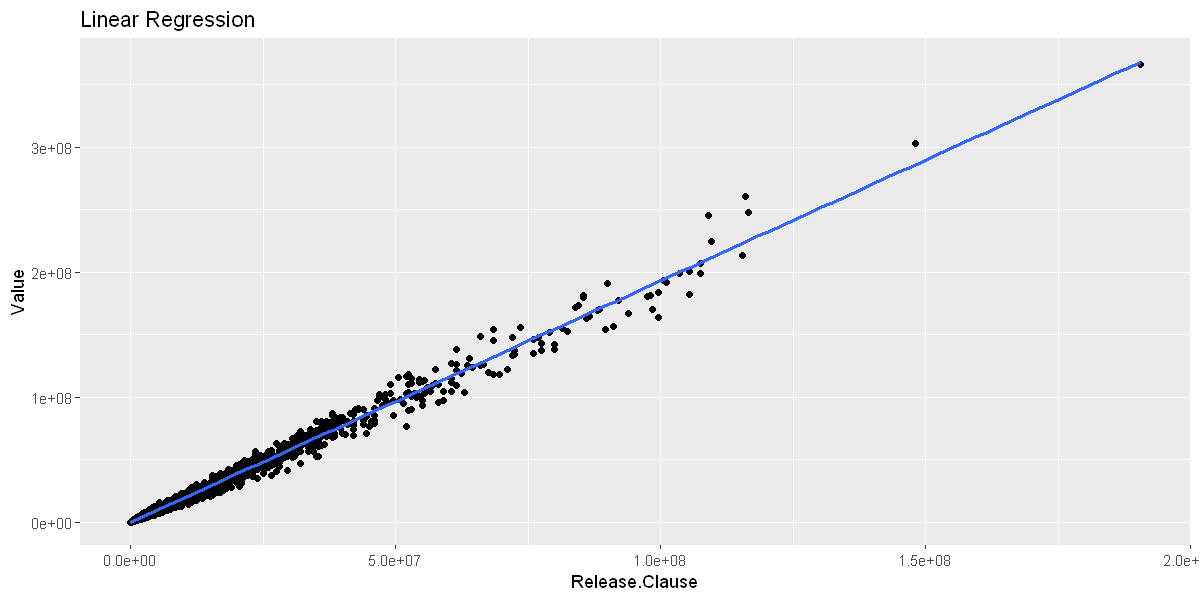

In [110]:
# Create a scatterplot with linear regression line 
ggplot(num_cols, aes(x = Value, y = Release.Clause)) +
  geom_point() +
  geom_smooth(method = "lm", formula = y ~ x) +
  labs(title = "Linear Regression", x = "Release.Clause", y = "Value")

In [111]:
# Fit a linear regression model
lm_model <- lm(Release.Clause ~ Value, data = num_cols)
# Summarize the model output
summary(lm_model)


Call:
lm(formula = Release.Clause ~ Value, data = num_cols)

Residuals:
      Min        1Q    Median        3Q       Max 
-28017566   -245450      9584    211600  36889878 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept) -1.042e+05  1.192e+04   -8.745   <2e-16 ***
Value        1.933e+00  1.432e-03 1349.866   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1466000 on 17204 degrees of freedom
Multiple R-squared:  0.9906,	Adjusted R-squared:  0.9906 
F-statistic: 1.822e+06 on 1 and 17204 DF,  p-value: < 2.2e-16


### Release Clause vs Nationality

In [112]:
# get top 10 nationalities
summary(hasReleaseClause$Nationality)[1:10]

England       Germany         Spain        France     Argentina 
         1446          1129           979           895           809 
       Brazil         Italy      China PR United States   Netherlands 
          707           521           438           420           398

In [113]:
# define an array of countries to filter by
# countries <- c("England", "Germany", "Spain", "France", "Italy")


# filter rows where player is in the array of countries
# df_filtered <- filter(hasReleaseClause, Nationality %in% countries)

df_filtered <- mutate(hasReleaseClause, countryGroup = ifelse(Nationality == "England", "England", "Not England"))
head(df_filtered); dim(df_filtered)

Full.Name,Wage,Value,Nationality,Release.Clause,Contract.Until,Release.Clause.Log,countryGroup
Kevin Sessa,7000,2400000,Germany,4200000,2024,15.25060,Not England
Thomas Keller,7000,2100000,Germany,3700000,2025,15.12384,Not England
Andreas Geipl,9000,1000000,Germany,1600000,2023,14.28551,Not England
Marnon Busch,14000,1800000,Germany,2800000,2023,14.84513,Not England
Florian Pick,8000,1100000,Germany,1700000,2024,14.34614,Not England
Jonas FÃ¶hrenbach,11000,1600000,Germany,2600000,2023,14.77102,Not England


[1] 17206     8

In [114]:
model <- aov(Release.Clause.Log ~ Nationality, data = df_filtered)
summary(model)

               Df Sum Sq Mean Sq F value Pr(>F)    
Nationality   157   6826   43.48   34.45 <2e-16 ***
Residuals   17048  21515    1.26                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [115]:
model <- aov(Wage ~ Nationality, data = df_filtered)
summary(model)

               Df    Sum Sq   Mean Sq F value Pr(>F)    
Nationality   157 3.633e+11 2.314e+09   6.343 <2e-16 ***
Residuals   17048 6.220e+12 3.648e+08                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

### Release Clause vs Contract Valid Until

In [126]:
summary(hasReleaseClause$Contract.Until); class(hasReleaseClause$Contract.Until)

- 2022 2023 2024 2025 2026 2027 2028 2031 2032 
   0 2218 5716 4460 2968 1204  611   25    2    2

[1] "factor"

In [130]:
# convert the values of column 'x' to numerical
hasReleaseClause$Contract.Until <- as.numeric(hasReleaseClause$Contract.Until); class(hasReleaseClause$Contract.Until);
head(hasReleaseClause)

[1] "numeric"

,Full.Name,Wage,Value,Nationality,Release.Clause,Contract.Until,Release.Clause.Log
1,Kevin Sessa,7000,2400000,Germany,4200000,4,15.25060
2,Thomas Keller,7000,2100000,Germany,3700000,5,15.12384
3,Andreas Geipl,9000,1000000,Germany,1600000,3,14.28551
4,Marnon Busch,14000,1800000,Germany,2800000,3,14.84513
6,Florian Pick,8000,1100000,Germany,1700000,4,14.34614
7,Jonas FÃ¶hrenbach,11000,1600000,Germany,2600000,3,14.77102


Everyone has a contract

In [132]:
df_contract_valid_until <- mutate(hasReleaseClause, Years.Left = Contract.Until - 2) # offset by 2 due to error in conversion
summary(df_contract_valid_until$Years.Left)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   2.000   1.836   3.000   8.000 

In [135]:
# heatmap
#Select numerical column
num_cols <- select_if(df_contract_valid_until, is.numeric)
colnames(num_cols)

[1] "Wage"               "Value"              "Release.Clause"    
[4] "Contract.Until"     "Release.Clause.Log" "Years.Left"

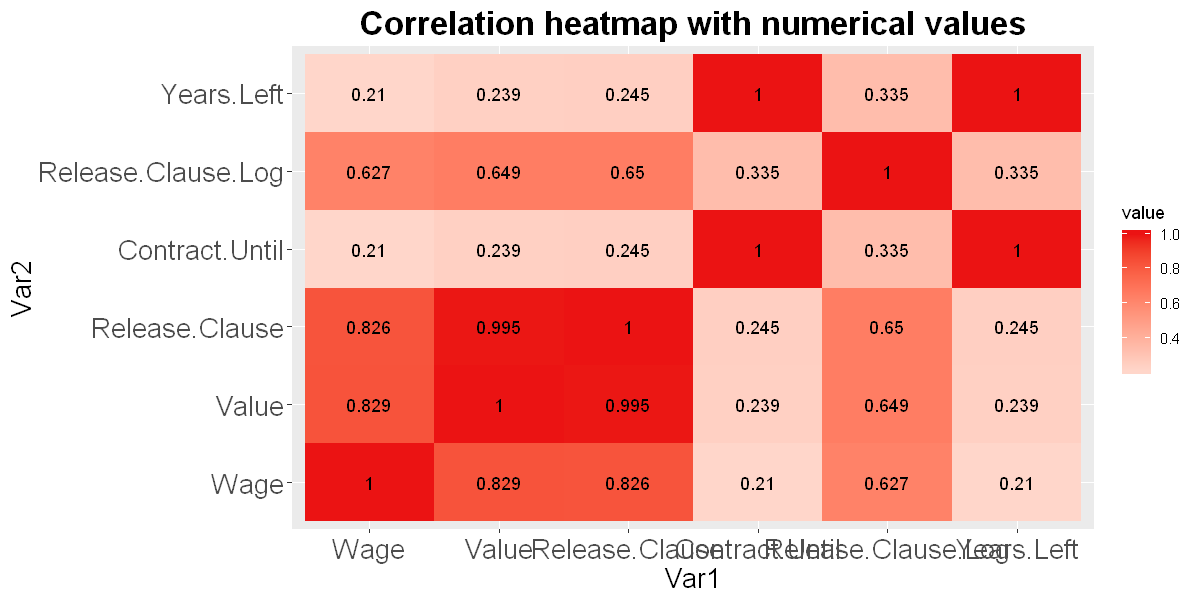

In [136]:
#Correlation of each numerical values
corr_mat <- cor(num_cols)
melted_corr_mat <- melt(corr_mat)

# Create the heatmap
heatmap <- ggplot(data = melted_corr_mat, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  geom_text(aes(label = round(value, 3))) +
  scale_fill_gradient2(low = "#0066CC", mid = "white", high = "#EB1313", midpoint = 0) +
  labs(title = "Correlation heatmap with numerical values") +
  theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 16),
        axis.text = element_text(size = 16))

plot(heatmap)

In [140]:
# paired t test 
t.test(df_contract_valid_until$Release.Clause.Log, df_contract_valid_until$Years.Left, paired=TRUE)


	Paired t-test

data:  df_contract_valid_until$Release.Clause.Log and df_contract_valid_until$Years.Left
t = 1121.5, df = 17205, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 12.58920 12.63328
sample estimates:
mean of the differences 
               12.61124 
